In [415]:
from collections import Counter

In [417]:
import pandas as pd
file1 = pd.read_csv('payments_main.tsv', sep='\t')
file2 = pd.read_csv('payments_training.tsv', sep='\t')

In [419]:
from matplotlib import pyplot as plt

In [421]:
file2.head()

,1,07.11.2024,15300.00,За участие в конференции в г. Майкоп по договору 88.367840-ДВ от 11 апреля 2026,SERVICE
0,2,07.11.2024,"40200,00",За оказание услуг по договору №79-02726В от 01...,SERVICE
1,3,07.11.2024,1440-00,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS
2,4,07.11.2024,240000000-00,Возврат денежных средств по договору займа №04...,LOAN
3,5,07.11.2024,1360000.00,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED
4,6,07.11.2024,"1820000,00",Оплата по дог.финансовой аренды №Б00358 от 30....,LEASING


In [423]:
def rename_columns(df):
    # Получаем количество столбцов
    num_columns = df.shape[1]

    # Проверяем, чтобы в DataFrame было достаточно колонок
    if num_columns < 4:
        raise ValueError("DataFrame должен содержать хотя бы 3 колонки для переименования.")

    # Задаём новые имена для первых трёх колонок
    new_column_names = ['id', 'Date', 'Summa', 'Text']

    # Добавляем имена для оставшихся колонок
    for i in range(1, num_columns - 3):
        new_column_names.append(f'Col{i}')

    # Применяем новые имена к DataFrame
    df.columns = new_column_names

    return df

In [425]:
file2 = rename_columns(file2)

In [427]:
file2.head()

,id,Date,Summa,Text,Col1
0,2,07.11.2024,"40200,00",За оказание услуг по договору №79-02726В от 01...,SERVICE
1,3,07.11.2024,1440-00,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS
2,4,07.11.2024,240000000-00,Возврат денежных средств по договору займа №04...,LOAN
3,5,07.11.2024,1360000.00,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED
4,6,07.11.2024,"1820000,00",Оплата по дог.финансовой аренды №Б00358 от 30....,LEASING


In [429]:
summa = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
cnt = file2['Col1'].value_counts()
mean_len = []

In [431]:
names = ['NON_FOOD_GOODS', 'FOOD_GOODS', 'SERVICE', 'BANK_SERVICE', 'TAX', 'LOAN', 'LEASING', 'REALE_STATE', 'NOT_CLASSIFIED']
for i in range(len(names)):
    mean_len.append(sum(len(s) for s in file2[file2['Col1'] == names[i]]['Text'])/cnt[i])
mean_len, names

C:\Users\Sergei\AppData\Local\Temp\ipykernel_12620\1881509527.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_len.append(sum(len(s) for s in file2[file2['Col1'] == names[i]]['Text'])/cnt[i])


([112.10416666666667,
  102.23333333333333,
  59.11494252873563,
  99.91836734693878,
  21.8125,
  72.09756097560975,
  114.8157894736842,
  93.85185185185185,
  61.65217391304348],
 ['NON_FOOD_GOODS',
  'FOOD_GOODS',
  'SERVICE',
  'BANK_SERVICE',
  'TAX',
  'LOAN',
  'LEASING',
  'REALE_STATE',
  'NOT_CLASSIFIED'])

In [437]:
def count_frequent_words(df, threshold=50):
    # Предположим, что текстовое поле находится в столбце с названием 'Text'.
    text_column = 'Text'

    # Приводим текст к нижнему регистру и разбиваем его на слова
    words = ' '.join(df[text_column].dropna().astype(str)).lower().split()
    
    # удаляем предлоги, так как они не информативны
    filtered_words = []
    prepositions = ['в', 'на', 'из', 'из-за', 'за', 'кроме', 'про', 'через', 'около', 'под', 'над', 'при', 'у', 'до',
                    'от', 'по', 'для', 'о', 'об', 'с', 'и', 'без', 'т.ч.', 'г', 'г.']
    years = ['20' + str(year) for year in range(10, 25)]
    prepositions += years
    
    for word in words:
        if word not in prepositions:
            filtered_words.append(word)

    # Подсчет частоты каждого слова
    word_counts = Counter(filtered_words)

    # Получаем список слов, которые встречаются больше заданного порога
    frequent_words = [word for word, count in word_counts.items() if count > threshold]
    cnt =  [count for word, count in word_counts.items() if count > threshold]
    return frequent_words, cnt

In [439]:
top, cnt = count_frequent_words(file2, 12)
top, cnt

(['оказание',
  'услуг',
  'договору',
  'оплата',
  'счету',
  'сумма',
  'возврат',
  'денежных',
  'средств',
  'займа',
  'ндс',
  'акт',
  'приема-передачи',
  'ндс(20%)',
  '20%',
  'процентного',
  'г..',
  'гос.',
  'пошлины',
  'комиссия',
  'лизинга',
  '-',
  '№',
  'услуги',
  'не',
  'учета',
  'банк"'],
 [14,
  20,
  171,
  269,
  166,
  147,
  14,
  14,
  20,
  41,
  102,
  17,
  25,
  50,
  35,
  27,
  16,
  13,
  14,
  39,
  20,
  14,
  13,
  19,
  13,
  13,
  16])

In [443]:
countWordDF = pd.DataFrame(columns=['cnt', 'class', 'word'])

for i in range(len(names)):
    l = ' '.join(file2[file2['Col1'] == names[i]]['Text']).lower()
    print("##########" + l + "###############")
    for j in range(len(top)):
        new_row = {
            'cnt': l.count(top[j]),
            'class': names[i],
            'word': top[j]
        }
        countWordDF = pd.concat([countWordDF, pd.DataFrame([new_row])], ignore_index=True)
    
        countWordDF['class'] = countWordDF['class'].astype('category')
        countWordDF['n_class'] = countWordDF['class'].cat.codes + 1


##########оплата за порошок стиральный ariel color automat 3кг по счету 89649723803465939448 от 14 августа 2024г сумма 1440-00 оплата за мицеллярная вода чистая линия цветочная 3в1 для всех типов кожи 400мл по счету 08804953061434955152 от 08 мая 2027г сумма 4900,00 оплата за стиральные порошки по счету 19434127004879168364 от 05.06.2026г. сумма 3250,00 предоплата за автозапчасти по счету 0067 от 27.07.2026 г. года; договор 26.072663-аб от 08 октября 2028 г. оплата за суперклей liberhaus универсал 3г по счету 80621549698721971780 от 2027.06.04 сумма 3380,00 предоплата по дог. №в03501 за раствор водный натриевых солей (поли)акриловой кислотысумма 4030000.00 в т.ч.ндс  671666.66 оплата за сковорода гардарика гранит c утолщенным дном из литого алюминия 24см по счету 28222764741752799303 от 20.12.2023 г. сумма 1290.00 оплата за запчасти по договору поставки №в03051/06 от 23/08/2024г. (гбд 0482 ао автодом ауди по счету №0424 оплата за дезодорант - антиперспирант рексона женский спрей нежно 

In [445]:
countWordDF.tail()

,cnt,class,word,n_class
238,6,NOT_CLASSIFIED,№,6
239,0,NOT_CLASSIFIED,услуги,6
240,10,NOT_CLASSIFIED,не,6
241,0,NOT_CLASSIFIED,учета,6
242,0,NOT_CLASSIFIED,"банк""",6


In [447]:
countWordDF.iloc[86] 

cnt                   0
class      BANK_SERVICE
word              сумма
n_class               1
Name: 86, dtype: object

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
оказание


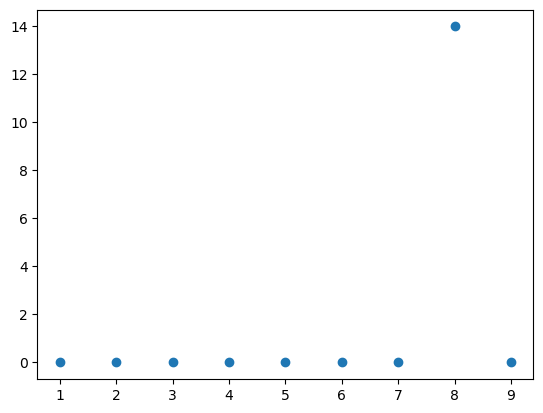

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
услуг


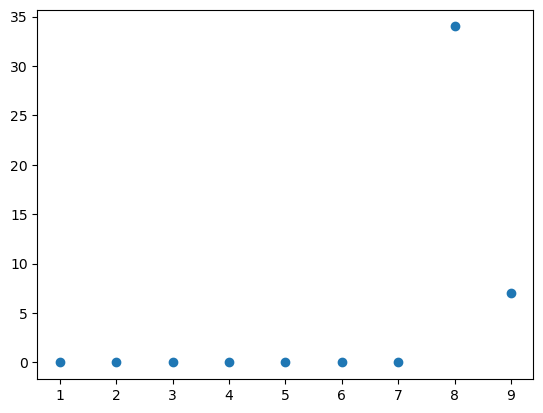

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
договору


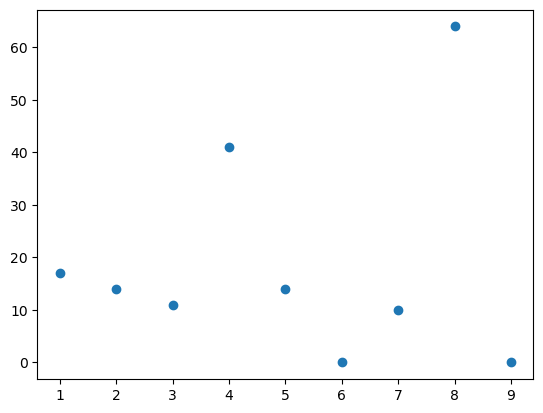

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
оплата


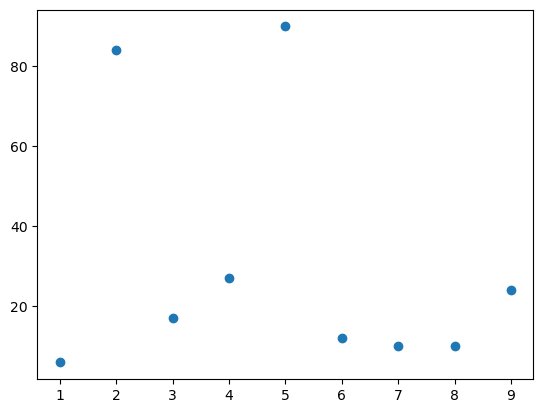

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
счету


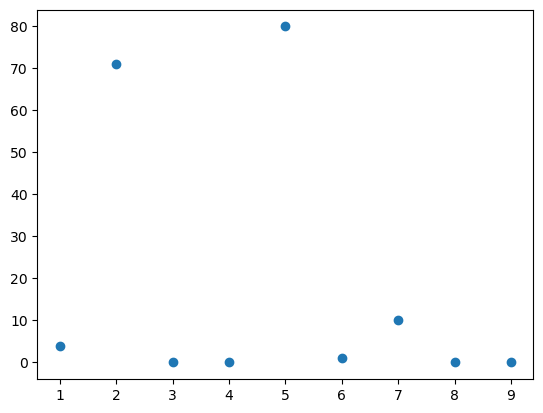

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
сумма


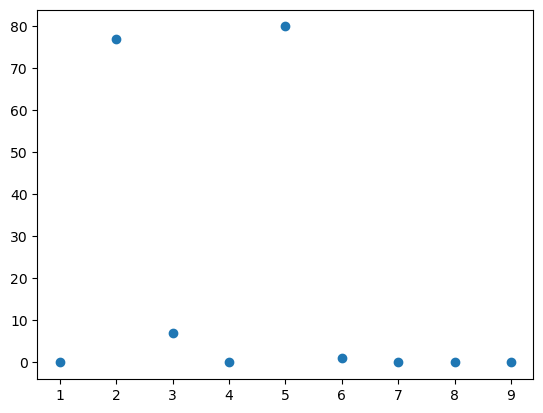

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
возврат


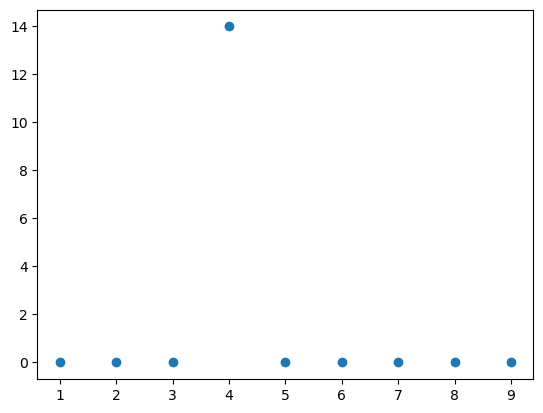

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
денежных


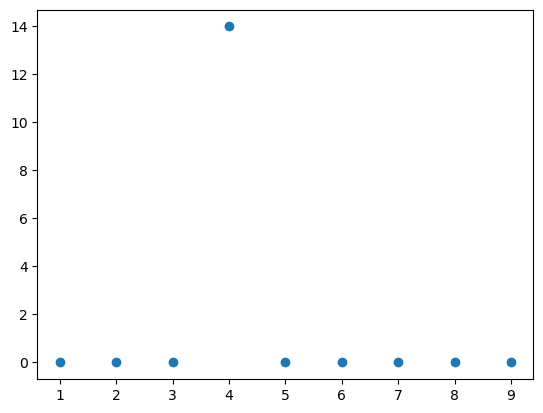

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
средств


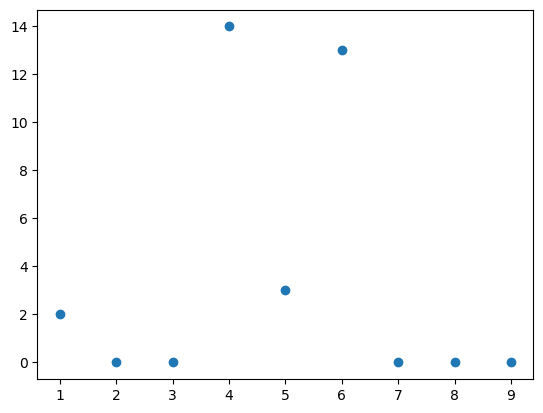

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
займа


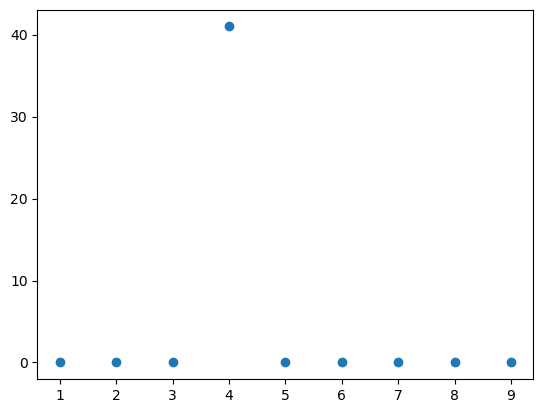

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
ндс


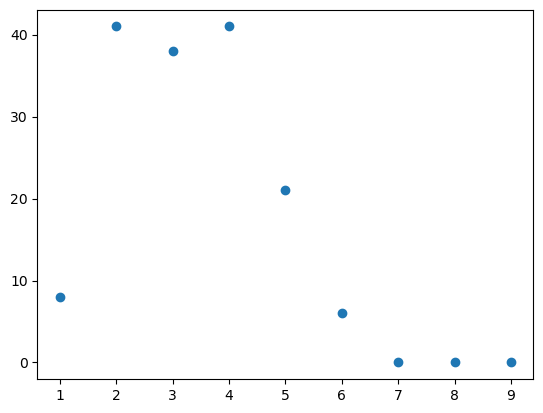

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
акт


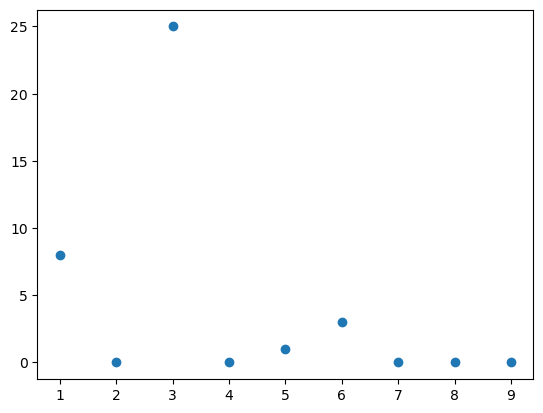

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
приема-передачи


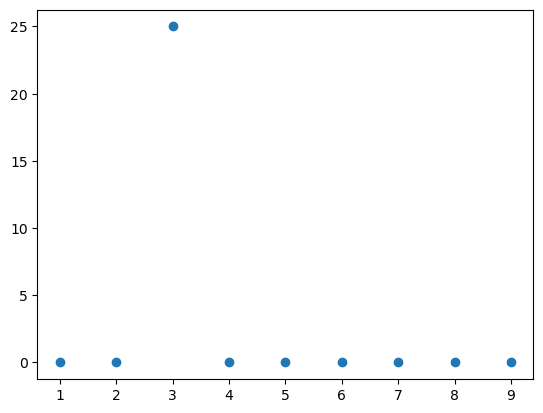

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
ндс(20%)


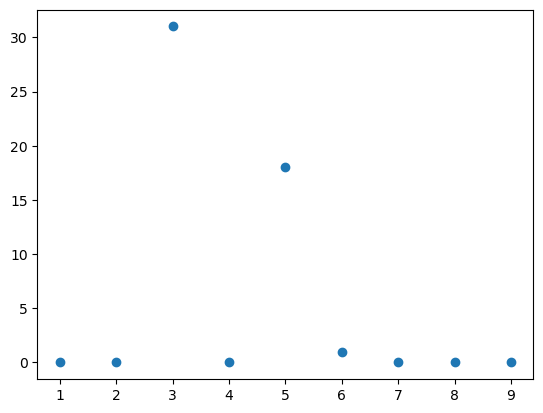

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
20%


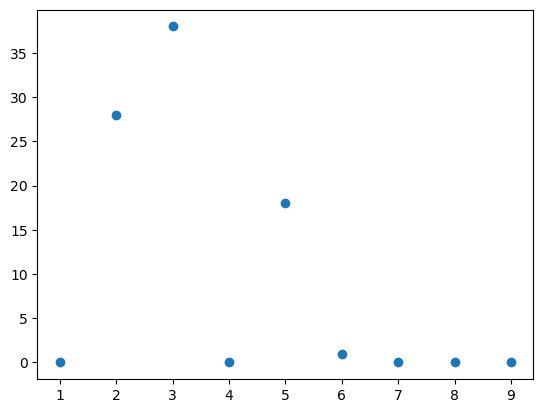

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
процентного


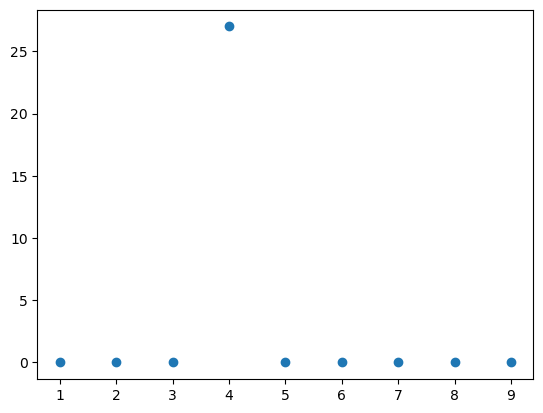

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
г..


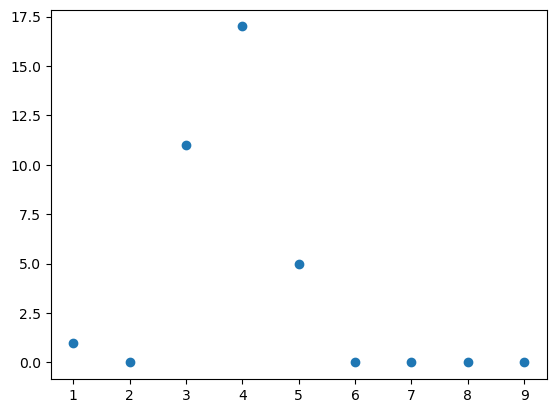

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
гос.


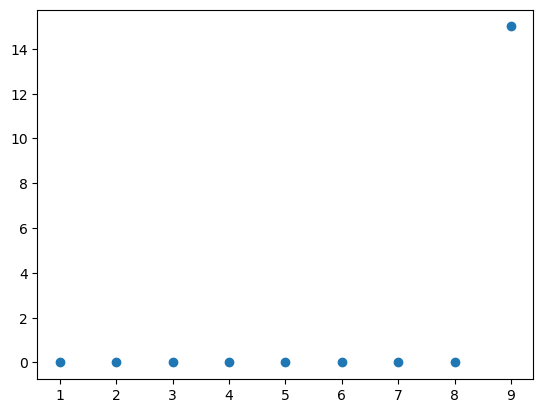

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
пошлины


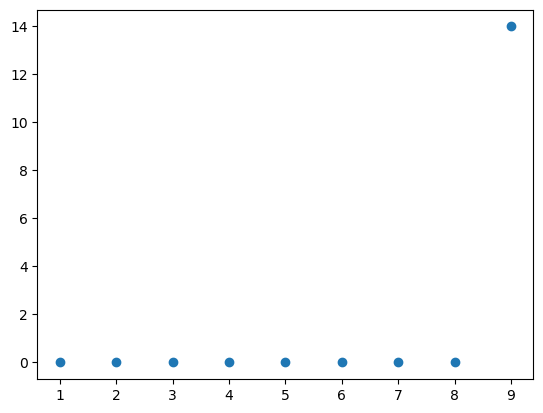

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
комиссия


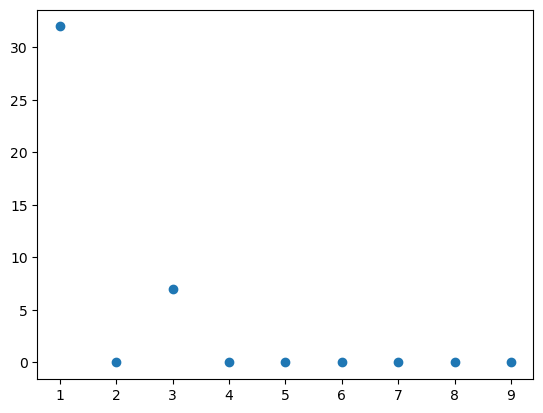

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
лизинга


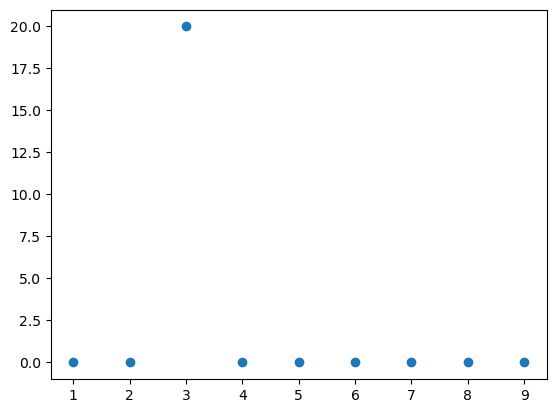

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
-


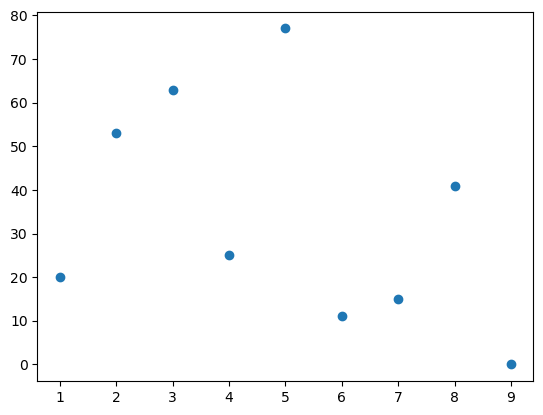

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
№


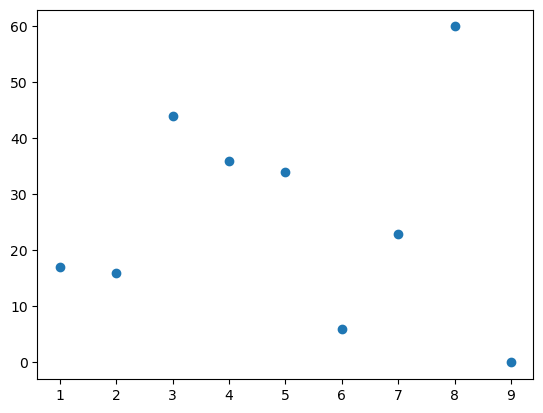

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
услуги


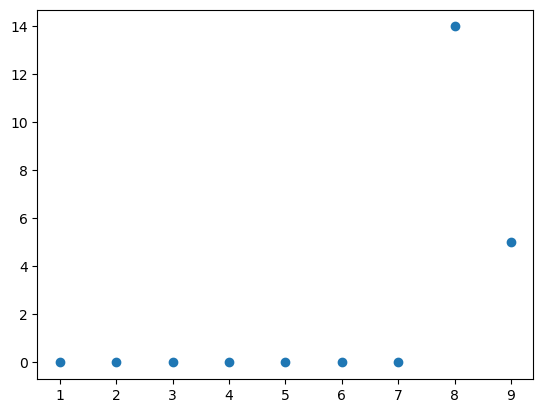

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
не


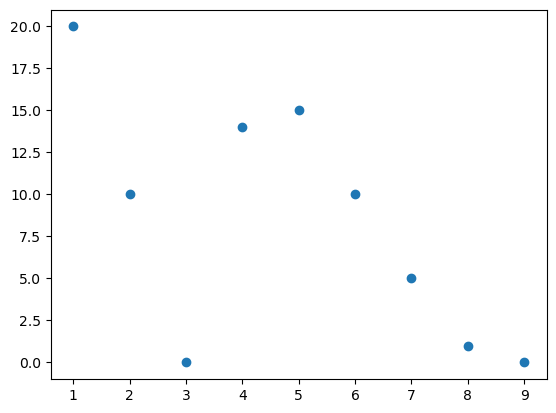

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
учета


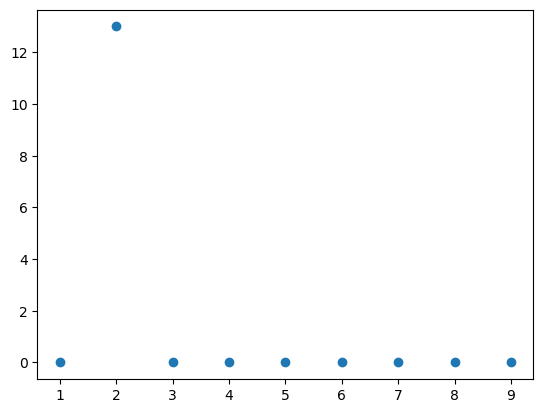

NON_FOOD_GOODS
FOOD_GOODS
SERVICE
BANK_SERVICE
TAX
LOAN
LEASING
REALE_STATE
NOT_CLASSIFIED
банк"


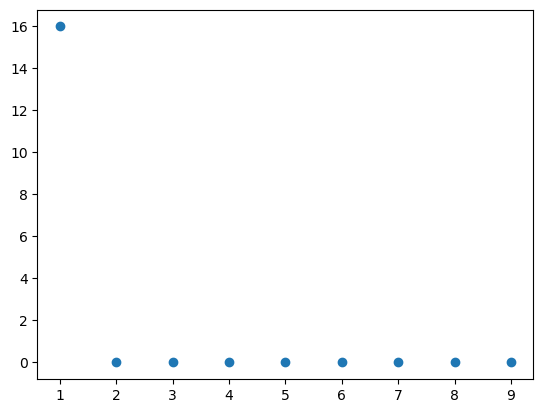

In [459]:
for i in range(len(top)):
    x = countWordDF[countWordDF['word'] == top[i]]["n_class"]
    y = countWordDF[countWordDF['word'] == top[i]]["cnt"]
    for j in range(len(names)):
        print(names[j])
    print(top[i])
    plt.scatter(x, y)
    plt.show()